[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu256s/snippets-nouns/blob/main/gen_nouns.ipynb)

# setup

## import

In [1]:
!git clone https://github.com/nounsDAO/nouns-monorepo.git

Cloning into 'nouns-monorepo'...
remote: Enumerating objects: 31313, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31313 (delta 20), reused 23 (delta 11), pack-reused 31272
Receiving objects: 100% (31313/31313), 9.78 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (23218/23218), done.


In [2]:
!git clone https://github.com/Cryptocoders-wtf/sushi-nouns-dao-assets.git

Cloning into 'sushi-nouns-dao-assets'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 164 (delta 52), reused 145 (delta 42), pack-reused 0
Receiving objects: 100% (164/164), 471.42 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [3]:
%ls

nouns-monorepo/  sample_data/  sushi-nouns-dao-assets/


In [4]:
import math
import random
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [5]:
seed = None
random.seed(seed)

## func

In [6]:
def im_stack(parts: list) -> Image.Image:
    for i, x in enumerate(parts):
        if i == 0:
            im = Image.open(x)
        else:
            _x = Image.open(x)
            im.paste(_x, mask=_x)
    return im

In [7]:
def plt_ims_auto(ims: list, ncols: int = 5):
    nrows = math.ceil(len(ims) / ncols)
    figsize = (ncols * 2, nrows * 2)
    plt_ims(ims, nrows=nrows, ncols=ncols, figsize=figsize)


def plt_ims(ims: list,
            nrows=4, ncols=5, figsize=(10, 8)):
  fig, axs = plt.subplots(nrows, ncols, figsize=figsize,
                          subplot_kw={'xticks': [], 'yticks': []})

  for ax in axs.flat:
    ax.axis('off')

  for ax, im in zip(axs.flat, ims):
      ax.imshow(im)

  fig.tight_layout()
  plt.show()

In [8]:
def table_traits(p_traits):
    df = pd.DataFrame([[y.stem for y in x] for x in p_traits],
            columns=['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses'] )
    display(df.replace("^.*?-", "", regex=True))

## traits

In [9]:
# nouns-assets
p0 = Path(r'./nouns-monorepo/packages/nouns-assets/images')

dir_traits0 = sorted([x for x in p0.iterdir() if x.is_dir()])
traits0 = [list(x.glob("*.png")) for x in dir_traits0]

print([x.name for x in dir_traits0])
print([len(x) for x in traits0])

['0-backgrounds', '1-bodies', '2-accessories', '3-heads', '4-glasses']
[2, 30, 137, 234, 21]


In [10]:
traits = traits0

# generate

## 1 noun

['bg-cool', 'body-foggrey', 'accessory-tie-black-on-white', 'head-outlet', 'glasses-square-guava']


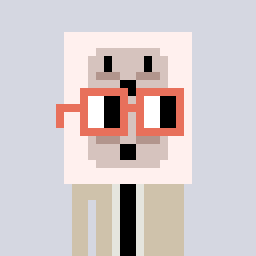

In [11]:
# # specify:
# parts = [dir_traits1[0] / 'bg-warm.png',
#          dir_traits1[1] / 'body-grayscale-1.png',
#          dir_traits1[2] / 'accessory-1n.png',
#          dir_traits1[3] / 'head-film-35mm.png',
#          dir_traits1[4] / 'glasses-square-red.png'
#          ]

# random:
parts = [random.choice(x) for x in traits]
noun = im_stack(parts)

print([x.stem for x in parts])
# noun
# noun.save("out.png")
noun.resize((256, 256), Image.NEAREST)

## n nouns

In [12]:
n = 20

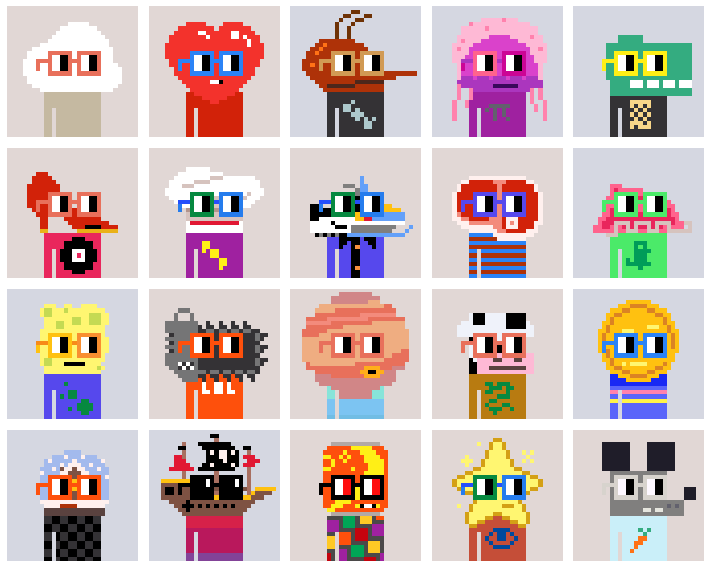

In [13]:
p_traits = [[random.choice(x) for x in traits]
            for i in range(n)]
ims = [im_stack(x) for x in p_traits]

plt_ims_auto(ims)

In [14]:
table_traits(p_traits)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,warm,purple,bege,cloud,square-guava
1,warm,red,none,heart,square-blue-med-saturated
2,cool,grayscale-8,txt-a2+b2,mosquito,square-honey
3,cool,magenta,txt-pi,jellyfish,square-pink-purple-multi
4,cool,grayscale-8,moon-block,dino,square-yellow-saturated
5,warm,redpinkish,lp,highheel,square-watermelon
6,warm,magenta,txt-pop,chefhat,square-green-blue-multi
7,warm,computerblue,shirt-black,snowmobile,square-green-blue-multi
8,warm,hotbrown,stripes-blue-med,steak,square-blue
9,cool,teal-light,dinosaur,retainer,square-teal


## for each head

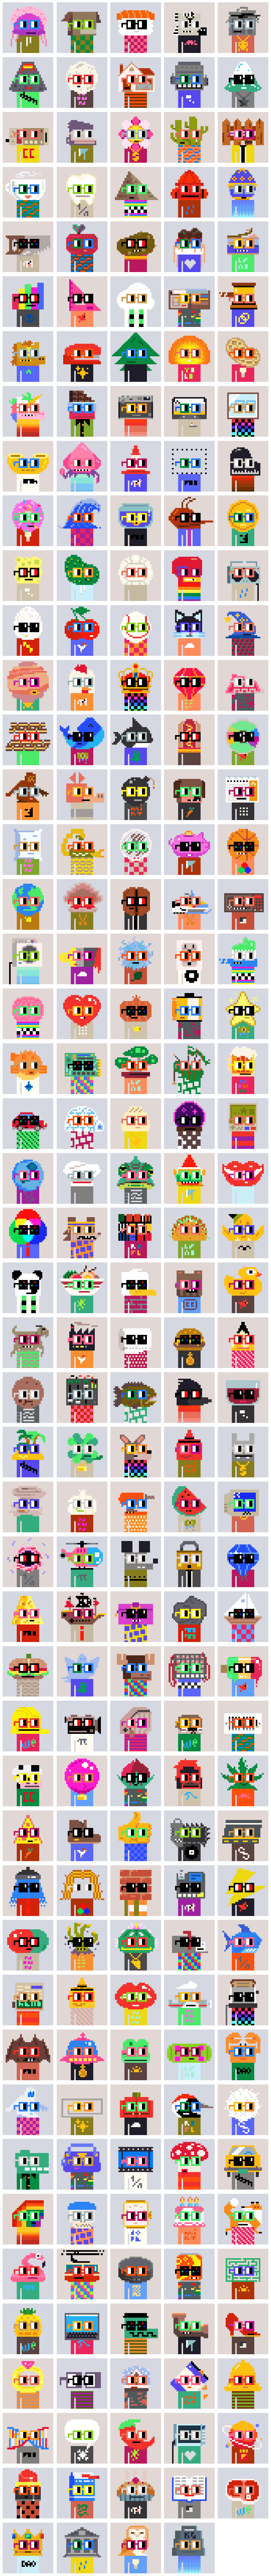

In [15]:
n = len(traits[3])
p_traits_head = [[
                random.choice(traits[0]),
                random.choice(traits[1]),
                random.choice(traits[2]),
                traits[3][i],
                random.choice(traits[4]),
                 ]
            for i in range(n)]
ims_head = [im_stack(x) for x in p_traits_head]

plt_ims_auto(ims_head)

In [16]:
table_traits(p_traits_head)

,0-backgrounds,1-bodies,2-accessories,3-heads,4-glasses
0,cool,gunk,hoodiestrings-uneven,jellyfish,square-blue-med-saturated
1,cool,gunk,checkers-big-green,box,square-frog-green
2,cool,darkpink,checkers-magenta-80,nigiri,square-black
3,warm,grayscale-9,aardvark,zebra,square-smoke
4,warm,peachy-B,bling-mask,trashcan,square-grey-light
...,...,...,...,...,...
229,cool,foggrey,txt-we,steak,square-watermelon
230,cool,cold,txt-dao-black,crown,square-magenta
231,cool,yellow,rain,bank,square-green-blue-multi
232,warm,blue-sky,lightbulb,owl,square-magenta
